In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
img = cv2.imread('C:/Users/JP/Downloads/vision code/1_grojzMfdgi6Kk_6sQIiA8Q.jpeg')

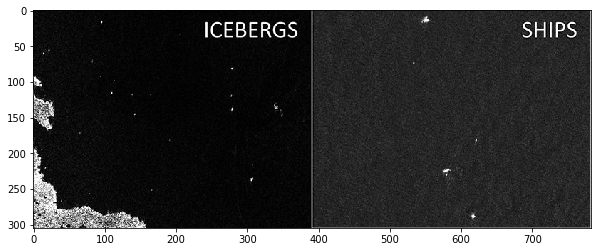

In [4]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.imshow(img)
#We don't have much resolution in images to visualize the shape of the ship.

In [5]:
train = pd.read_json('C:/Users/JP/Downloads/vision code/train.json/data/processed/train.json')
train['inc_angle'] = pd.to_numeric(train['inc_angle'],errors='coerce')

In [6]:
def get_stats(train,label=1):
    train['max'+str(label)] = [np.max(np.array(x)) for x in train['band_'+str(label)] ]
    train['maxpos'+str(label)] = [np.argmax(np.array(x)) for x in train['band_'+str(label)] ]
    train['min'+str(label)] = [np.min(np.array(x)) for x in train['band_'+str(label)] ]
    train['minpos'+str(label)] = [np.argmin(np.array(x)) for x in train['band_'+str(label)] ]
    train['med'+str(label)] = [np.median(np.array(x)) for x in train['band_'+str(label)] ]
    train['std'+str(label)] = [np.std(np.array(x)) for x in train['band_'+str(label)] ]
    train['mean'+str(label)] = [np.mean(np.array(x)) for x in train['band_'+str(label)] ]
    train['p25_'+str(label)] = [np.sort(np.array(x))[int(0.25*75*75)] for x in train['band_'+str(label)] ]
    train['p75_'+str(label)] = [np.sort(np.array(x))[int(0.75*75*75)] for x in train['band_'+str(label)] ]
    train['mid50_'+str(label)] = train['p75_'+str(label)]-train['p25_'+str(label)]

    return train
train = get_stats(train,1)
train = get_stats(train,2)

In [7]:
train.head(2)

,id,band_1,band_2,inc_angle,is_iceberg,max1,maxpos1,min1,minpos1,med1,...,max2,maxpos2,min2,minpos2,med2,std2,mean2,p25_2,p75_2,mid50_2
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0,-0.213149,2735,-38.211376,2404,-27.879921,...,-11.252153,2810,-41.135918,3125,-30.007847,2.381284,-29.910117,-31.591387,-28.267622,3.323765
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0,12.570409,2956,-23.125309,3841,-13.654199,...,0.044052,2957,-34.765831,4349,-25.486130,2.934098,-25.359106,-26.963490,-23.997253,2.966237


In [8]:
train.shape

(1604, 25)

In [9]:
#         WATER........... SETTLEMENTS........ AGRICULTURE........... BARREN........
# 1.HH: -27.001 ................ 2.70252 ................. -12.7952 ................ -17.25790909  
# transmit/receive horizontally

# 2.HV: -28.035 ................ -20.2665 .................. -21.4471 ................. -20.019  
#transmit horizontally and receive vertically

#the HH component varies a lot but HV doesn't
#it should vary differently as compared to ice object.

In [10]:
icebergs = train[train.is_iceberg==1].sample(n=100,random_state=123)
ships = train[train.is_iceberg==0].sample(n=100,random_state=456)

In [11]:
#################### band1 icebergs ##########################

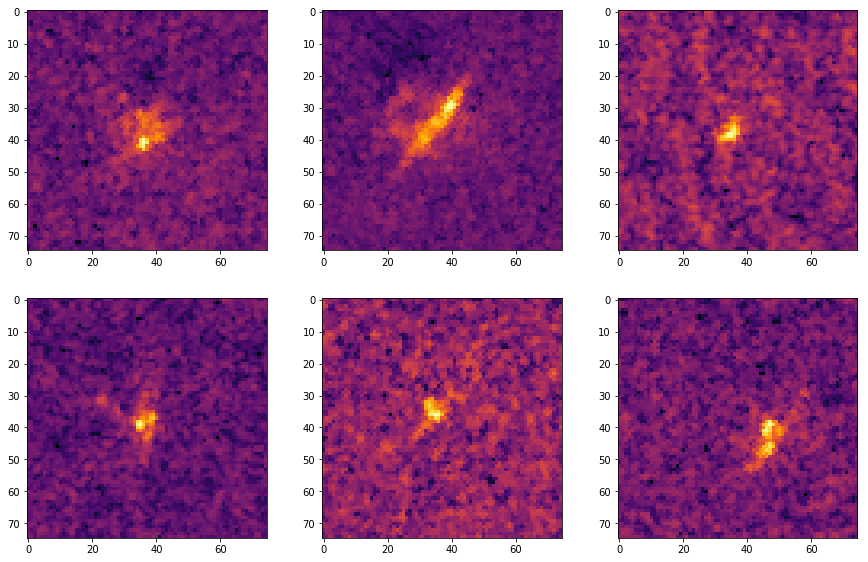

In [12]:
fig = plt.figure(1,figsize=(15,15))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(icebergs.iloc[i,1]),(75,75))
    ax.imshow(arr,cmap='inferno')
    
plt.show()

In [13]:
############# band2 icebergs#################

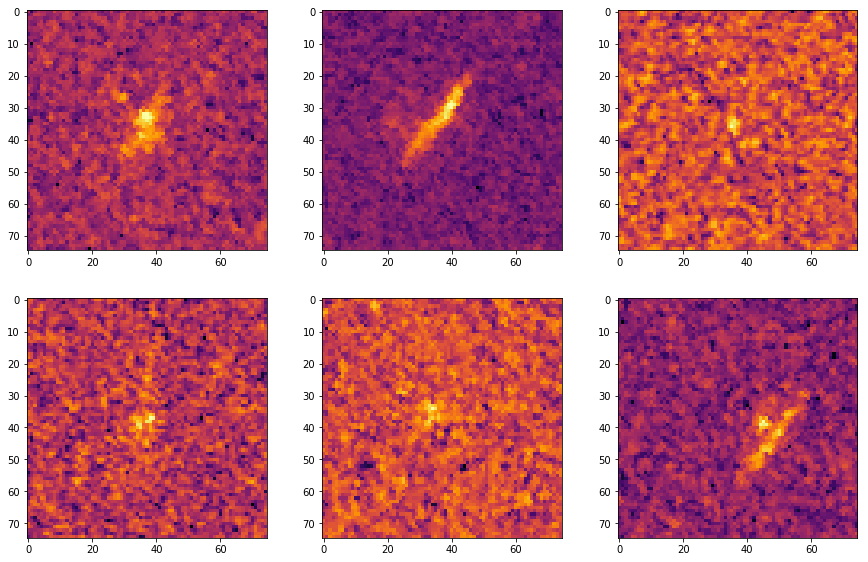

In [14]:
fig = plt.figure(1,figsize=(15,15))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(icebergs.iloc[i,2]),(75,75))
    ax.imshow(arr,cmap='inferno')
    
plt.show()

In [15]:
################# band1 ships############

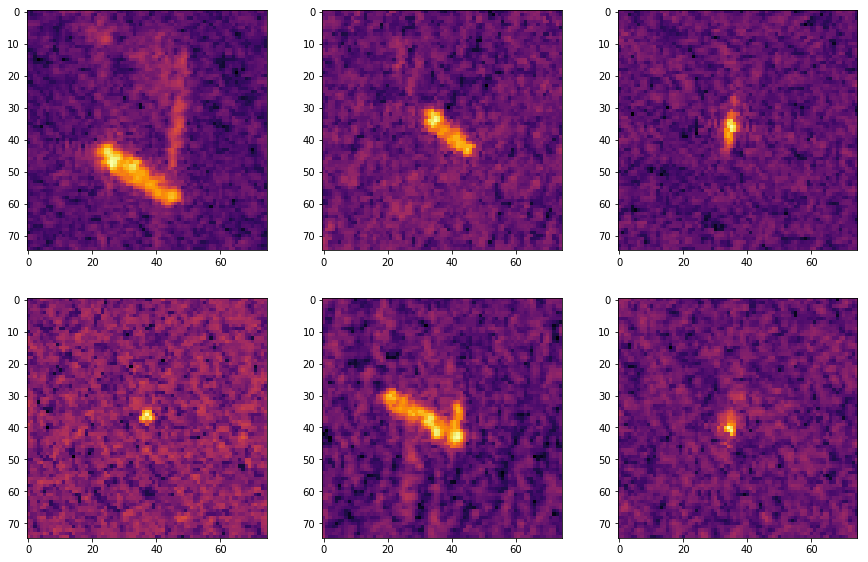

In [16]:
fig = plt.figure(1,figsize=(15,15))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(ships.iloc[i,1]),(75,75))
    ax.imshow(arr,cmap='inferno')
    
plt.show()

In [17]:
################# band2 ships############

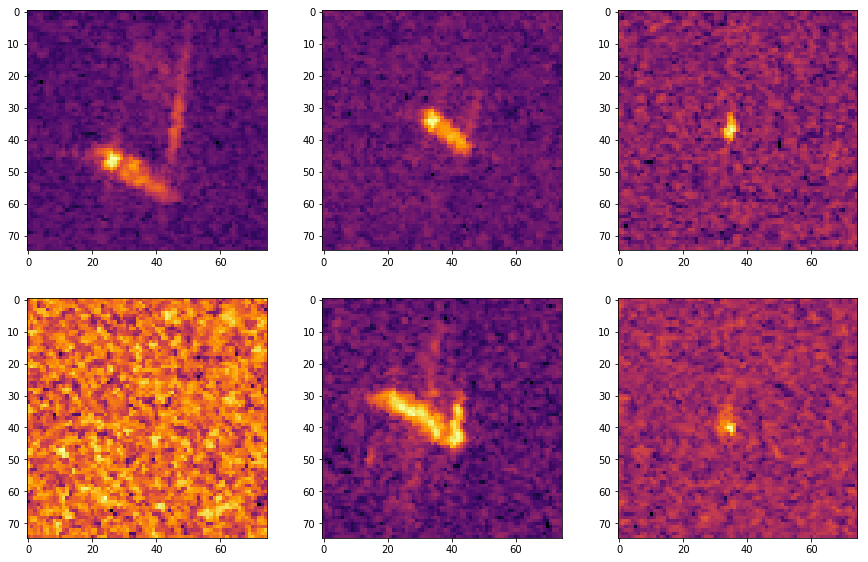

In [18]:
fig = plt.figure(1,figsize=(15,15))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(ships.iloc[i,2]),(75,75))
    ax.imshow(arr,cmap='inferno')
    
plt.show()

In [19]:
############## filter (Derivative with Respect to X) ###########
#X-derivative - antisymmetric with respect to reversing the values around the x-axis.
#edge detection in the x-direction. 

In [20]:
from scipy import signal
xder = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

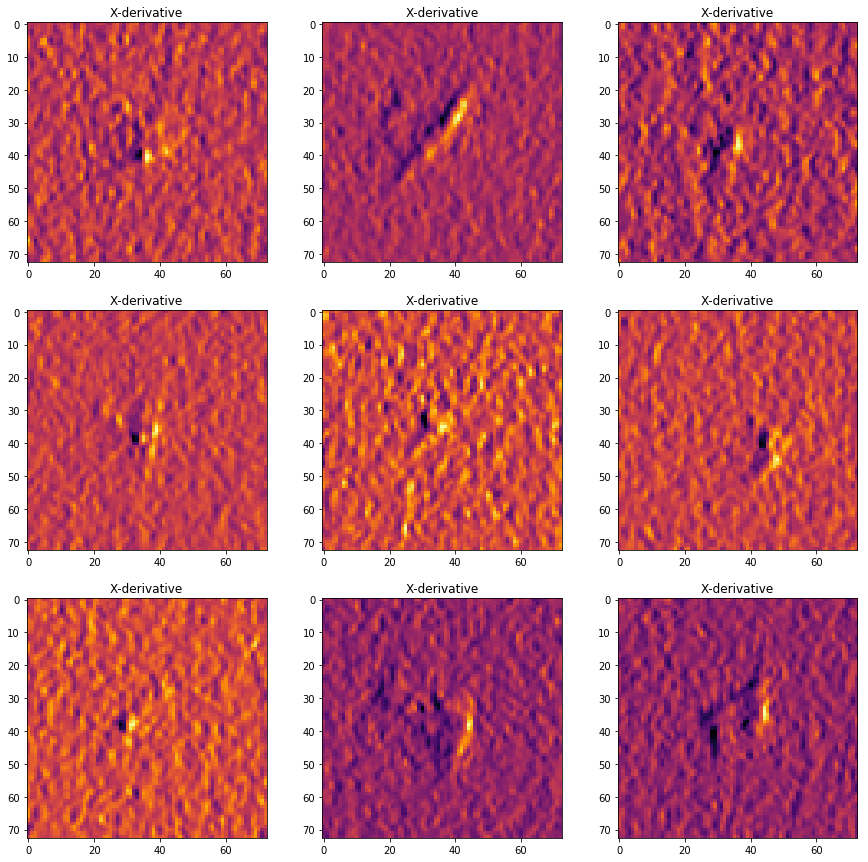

In [21]:
#icebergs
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = signal.convolve2d(np.reshape(np.array(icebergs.iloc[i,1]),(75,75)),xder,mode='valid')
    ax.imshow(arr,cmap='inferno')
    ax.set_title('X-derivative')
    
plt.show()

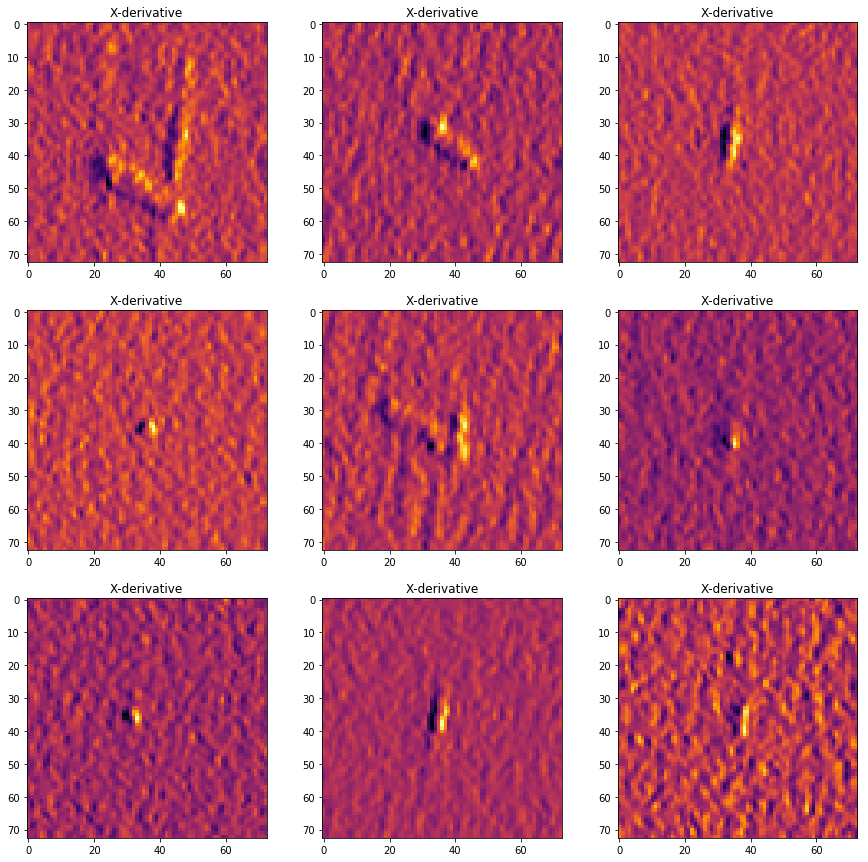

In [22]:
#ships
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = signal.convolve2d(np.reshape(np.array(ships.iloc[i,1]),(75,75)),xder,mode='valid')
    ax.imshow(arr,cmap='inferno')
    ax.set_title('X-derivative')
    
plt.show()

In [23]:
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])

In [24]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
def plotmy3d(c, name):

    data = [
        go.Surface(
            z=c
        )
    ]
    layout = go.Layout(
        title=name,
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)
plotmy3d(X_band_1[12,:,:], 'iceberg')
# in radar data, the shape of the iceberg is going to be like a mountain
#since this is not a actual image but scatter from radar
#the shape is going to have peaks and distortions

In [25]:
#The shape of the ship is going to be like a point, may be like a elongated point.
#From here the structural differences arise and we can exploit those differences using a CNN. 
#It would be helpful if we can create composite images using the backscatter from radar.
plotmy3d(X_band_1[14,:,:], 'Ship')
#We don't have much resolution in images to visualize the shape of the ship. However CNN is here to help.

In [28]:
import numpy as np 
np.random.seed(666)
import pandas as pd 
from sklearn.model_selection import train_test_split
from subprocess import check_output

In [29]:
#Load data
train = pd.read_json("C:/Users/JP/Downloads/vision code/train.json/data/processed/train.json")
test = pd.read_json("C:/Users/JP/Downloads/vision code/test.json/data/processed/test.json")
train.inc_angle = train.inc_angle.replace('na', 0)
train.inc_angle = train.inc_angle.astype(float).fillna(0.0)
print("done!")

done!


In [30]:
# Train data
x_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
x_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([x_band1[:, :, :, np.newaxis]
                          , x_band2[:, :, :, np.newaxis]
                         , ((x_band1+x_band1)/2)[:, :, :, np.newaxis]], axis=-1)
X_angle_train = np.array(train.inc_angle)
y_train = np.array(train["is_iceberg"])

# Test data
x_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_1"]])
x_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_2"]])
X_test = np.concatenate([x_band1[:, :, :, np.newaxis]
                          , x_band2[:, :, :, np.newaxis]
                         , ((x_band1+x_band1)/2)[:, :, :, np.newaxis]], axis=-1)
X_angle_test = np.array(test.inc_angle)


X_train, X_valid, X_angle_train, X_angle_valid, y_train, y_valid = train_test_split(X_train
                    , X_angle_train, y_train, random_state=123, train_size=0.75)

In [31]:
X_train.shape

(1203, 75, 75, 3)

In [32]:
X_test.shape

(8424, 75, 75, 3)

In [35]:
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
import matplotlib.pyplot as plt

def get_callbacks(filepath, patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]
    
def get_model():
    bn_model = 0
    p_activation = "relu"
    input_1 = Input(shape=(75, 75, 3), name="X_1")
    input_2 = Input(shape=[1], name="angle")
    
    img_1 = Conv2D(16, kernel_size = (3,3), activation=p_activation) ((BatchNormalization(momentum=bn_model))(input_1))
    img_1 = Conv2D(16, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = MaxPooling2D((2,2)) (img_1)
    img_1 = Dropout(0.2)(img_1)
    
    img_1 = Conv2D(32, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = Conv2D(32, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = MaxPooling2D((2,2)) (img_1)
    img_1 = Dropout(0.2)(img_1)
    
    img_1 = Conv2D(64, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = Conv2D(64, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = MaxPooling2D((2,2)) (img_1)
    img_1 = Dropout(0.2)(img_1)

    
    img_1 = Conv2D(128, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = MaxPooling2D((2,2)) (img_1)
    img_1 = Dropout(0.2)(img_1)
    img_1 = GlobalMaxPooling2D() (img_1)
    
    
    img_2 = Conv2D(128, kernel_size = (3,3), activation=p_activation) ((BatchNormalization(momentum=bn_model))(input_1))
    img_2 = MaxPooling2D((2,2)) (img_2)
    img_2 = Dropout(0.2)(img_2)
    img_2 = GlobalMaxPooling2D() (img_2)
    
    img_concat =  (Concatenate()([img_1, img_2, BatchNormalization(momentum=bn_model)(input_2)]))
    
    dense_ayer = Dropout(0.2) (BatchNormalization(momentum=bn_model) ( Dense(256, activation=p_activation)(img_concat) ))
    dense_ayer = Dropout(0.2) (BatchNormalization(momentum=bn_model) ( Dense(64, activation=p_activation)(dense_ayer) ))
    output = Dense(1, activation="sigmoid")(dense_ayer)
    
    model = Model([input_1,input_2],  output)
    optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model
model = get_model()
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X_1 (InputLayer)                (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (None, 75, 75, 3)    12          X_1[0][0]                        
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 73, 73, 16)   448         batch_normalization_11[0][0]     
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 71, 71, 16)   2320        conv2d_17[0][0]                  
____________________________________________________________________________________________

Train on 1203 samples, validate on 401 samples
Epoch 1/100
1203/1203 [==============================] - 42s 35ms/step - loss: 0.5265 - accuracy: 0.7498 - val_loss: 0.4340 - val_accuracy: 0.8229
Epoch 2/100
1203/1203 [==============================] - 38s 32ms/step - loss: 0.4026 - accuracy: 0.8246 - val_loss: 0.4319 - val_accuracy: 0.8055
Epoch 3/100
1203/1203 [==============================] - 39s 33ms/step - loss: 0.3360 - accuracy: 0.8495 - val_loss: 0.2925 - val_accuracy: 0.8504
Epoch 4/100
1203/1203 [==============================] - 52s 43ms/step - loss: 0.3106 - accuracy: 0.8612 - val_loss: 0.4013 - val_accuracy: 0.8354
Epoch 5/100
1203/1203 [==============================] - 37s 31ms/step - loss: 0.2928 - accuracy: 0.8770 - val_loss: 0.3368 - val_accuracy: 0.8753
Epoch 6/100
1203/1203 [==============================] - 36s 30ms/step - loss: 0.2980 - accuracy: 0.8653 - val_loss: 0.2777 - val_accuracy: 0.8678
Epoch 7/100
1203/1203 [==============================] - 31s 26ms/step 

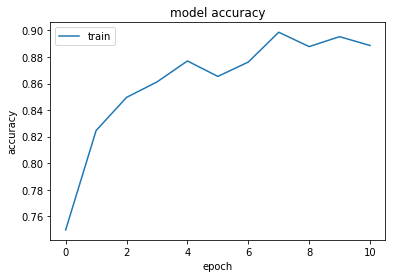

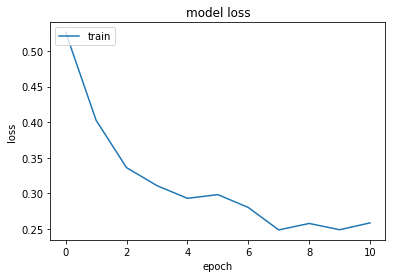

In [36]:
file_path = ".model_weights.hdf5"
callbacks = get_callbacks(filepath=file_path, patience=5)

model = get_model()
history = model.fit([X_train, X_angle_train], y_train, epochs=100,validation_data=([X_valid, X_angle_valid], y_valid)
         ,batch_size=32,callbacks=callbacks)

fig = plt.figure()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

fig.savefig('my_figure_1.png')




# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

fig.savefig('my_figure_2.png')

In [37]:
prediction = model.predict([X_test, X_angle_test], verbose=1)

8424/8424 [==============================] - 59s 7ms/step


In [38]:
submission = pd.DataFrame({'id': test["id"], 'is_iceberg': prediction.reshape((prediction.shape[0]))})
submission.head(10)

,id,is_iceberg
0,5941774d,0.047476
1,4023181e,0.000061
2,b20200e4,0.000000
3,e7f018bb,0.911852
4,4371c8c3,0.000492
5,a8d9b1fd,0.000200
6,29e7727e,0.388819
7,92a51ffb,0.948088
8,c769ac97,0.003266
9,aee0547d,0.012835


In [39]:
submission.shape


(8424, 2)

In [40]:
#for i in range(0,8424) :
#    submission['is_iceberg']= 1/(1 + np.exp(-(submission['is_iceberg'])))

In [ ]:
#submission.to_csv('C:/Users/JP/Downloads/vision code/sub8.csv',index=False)